In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_data_hand_shape(n_hand=500, n_pointer=150, n_middle=150, n_ring=150, n_pinky=150):
    fin = np.append(np.true_divide(np.arange(7), 7), 1)
    data = []

    i = 0
    while i < (n_hand + n_pointer + n_middle + n_ring + n_pinky):
        randX = random.uniform(0, 1)
        randY = random.uniform(0, 1)

        if i < n_hand and randY <= 0.5:
            data.append((randX, randY))
            i += 1
        elif n_hand <= i < (n_hand + n_pointer) and randY >= 0.5 and fin[0] < randX < fin[1]:
            data.append((randX, randY))
            i += 1
        elif (n_hand + n_pointer) <= i < (n_hand + n_pointer + n_middle) and randY >= 0.5 and fin[2] < randX < fin[3]:
            data.append((randX, randY))
            i += 1
        elif (n_hand + n_pointer + n_middle) <= i < (n_hand + n_pointer + n_middle + n_ring) and randY >= 0.5 and fin[4] < randX < fin[5]:
            data.append((randX, randY))
            i += 1
        elif (n_hand + n_pointer + n_middle + n_ring) <= i and randY >= 0.5 and fin[6] < randX < fin[7]:
            data.append((randX, randY))
            i += 1

    return pd.DataFrame(data)


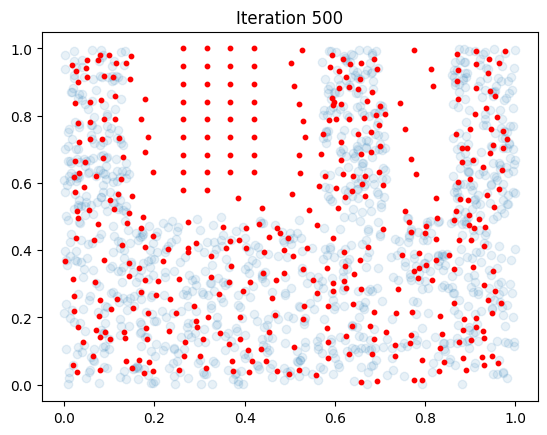

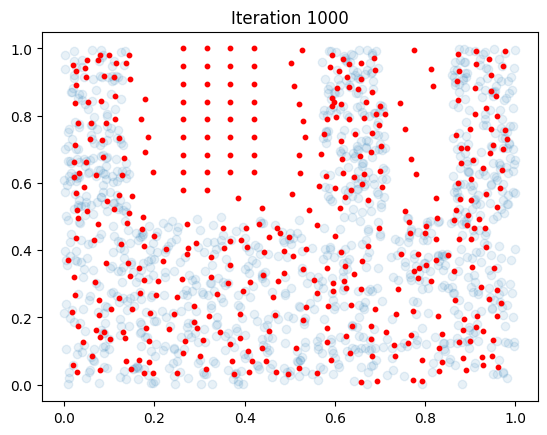

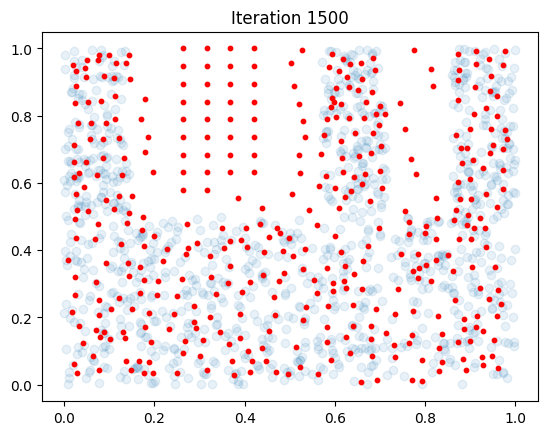

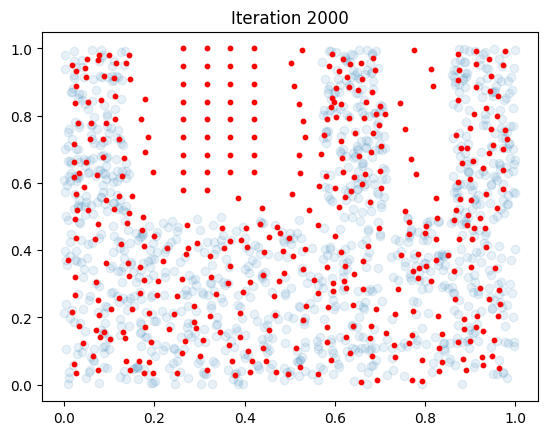

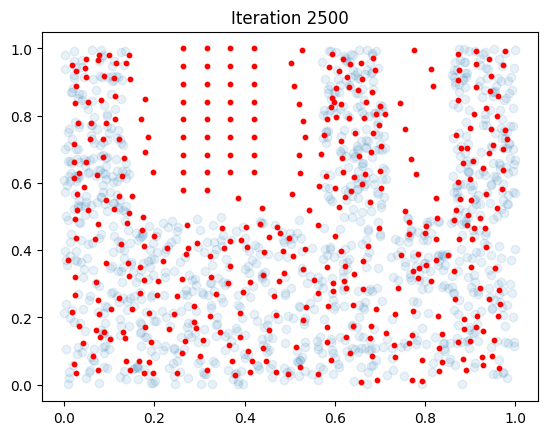

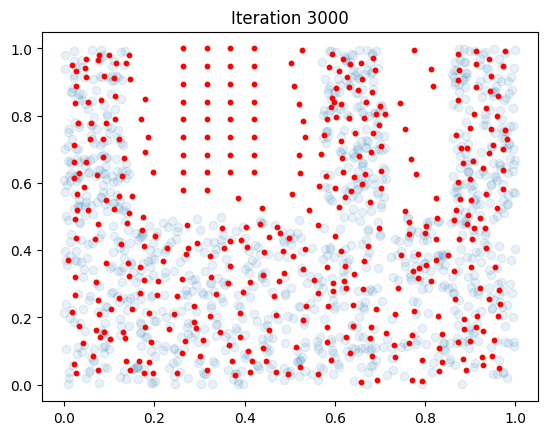

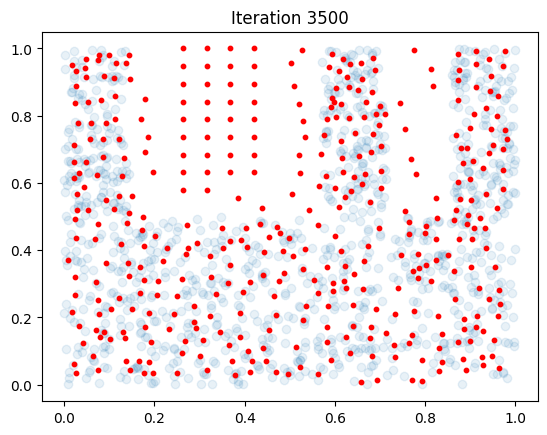

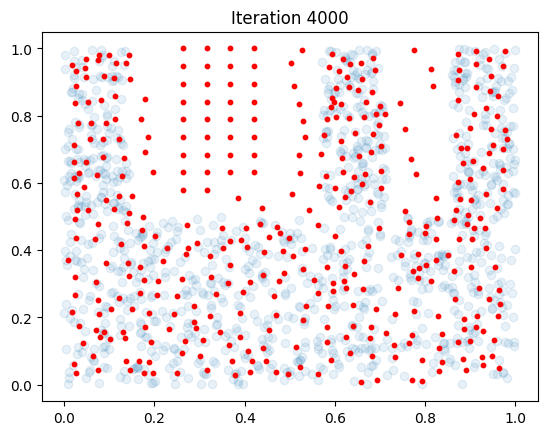

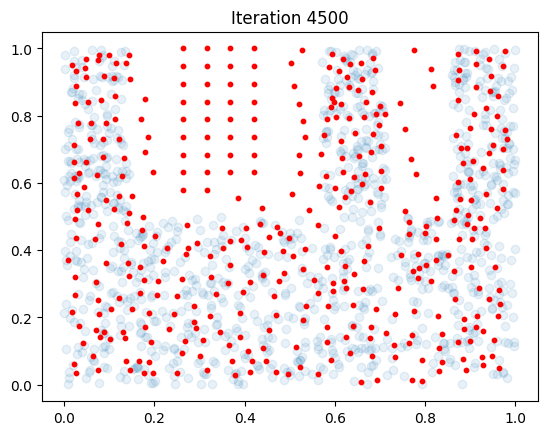

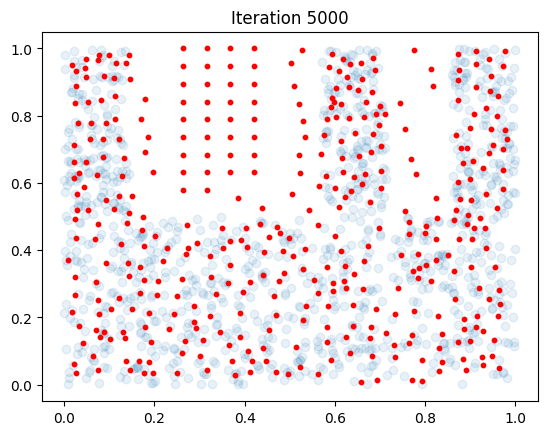

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


def make_nlist(n_neurons):
        nueron_lst = []
        row = []

        xarr = np.linspace(0, 1, n_neurons)
        yarr = np.linspace(0, 1, n_neurons)

        for j in range(n_neurons):
            row = []
            for i in range(n_neurons):
                randX = random.uniform(0, 1)
                randY = random.uniform(0, 1)
                row.append([xarr[i],yarr[j]])
            nueron_lst.append(row)
        return nueron_lst

def generate_data(n=2000):
    random.seed(1)
    return pd.DataFrame(np.random.rand(n, 2))

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=-1)

def find_winner(point, neurons):
    distances = euclidean_distance(point, neurons.reshape(-1, neurons.shape[-1]))
    return divmod(np.argmin(distances), neurons.shape[0])

def update_weights(weights, winner_idx, point, learning_rate, neighborhood):
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            dist = np.linalg.norm(np.array([i, j]) - np.array(winner_idx))
            if dist <= neighborhood:
                influence = np.exp(-((dist)**2) / (2*(neighborhood**2)))
                weights[i][j] += learning_rate * influence * (point - weights[i][j])
    return weights

def plot_neurons(iteration, neurons, data):
    plt.scatter(data[0], data[1], alpha=0.1)
    plt.scatter(neurons[:, :, 0], neurons[:, :, 1], color='r', marker='o', s=10)
    plt.title(f"Iteration {iteration}")
    plt.show()

def kohonen_algorithm(n_neurons, n_iterations, init_lr=0.5, decay_rate=500):
    data = generate_data_hand_shape(n_hand=650, n_middle=0)
    neurons = np.array(make_nlist(n_neurons))
    init_neighborhood = np.sqrt(n_neurons) / 2

    for i in range(1, n_iterations + 1):
        point = data.sample().values[0]
        winner_idx = find_winner(point, neurons)

        lr = init_lr * np.exp(-i / decay_rate)
        neighborhood = init_neighborhood * np.exp(-i / decay_rate)

        neurons = update_weights(neurons, winner_idx, point, lr, neighborhood)

        if i % 500 == 0:
            plot_neurons(i, neurons, data)

    return neurons

# Fit the SOM to the 4-finger hand-like data
neurons_hand = kohonen_algorithm(20, 5000)